# Crypto Arbitrage
Financial analysis to determine if any arbitrage opportunities exists for Bitcoin through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. We will perform the same in following phases:
* Collecting CSV data in a Jupyter notebook file.
* Preparing the datasets for analysis by cleaning missing and erroneous data.
* Analyzing the data at a high level through summary statistics and visualizations, and use this information to select areas for deeper analysis. Specifically, you’ll select time periods in which to identify arbitrage opportunities.

###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

# 1. Collect the Data

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file and `coinbase.csv` file, create DataFrames called `bitstamp` and `coinbase`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.
2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.


In [2]:
# Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file , and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date",Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("./Resources/bitstamp.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True)


In [3]:
# Step 2: Use the head (and/or tail) function to confirm that the data was imported properly.
display(bitstamp.head())
display(bitstamp.tail())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


In [4]:
# Step 1: Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp", Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("./Resources/coinbase.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True)

In [5]:
# Step 2: Use the head (and/or tail) function to confirm that the data was imported properly.
display(coinbase.head())
display(coinbase.tail())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


# 2. Prepare the Data

1. For the bitstamp and coinbase DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.
2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.
3. Convert the data type of the Close column to a `float`.
4. Review the data for duplicated values, and drop them if necessary.

### For bitstamp dataframe

In [6]:
# Step 1:For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [7]:
bitstamp = bitstamp.dropna().copy()
bitstamp

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


In [8]:
# Step 2: Use the str.replace function to remove the dollar($) sign,Bitcoin prices in 'Close' column has $ sign

bitstamp.loc[:,'Close']= bitstamp.loc[:,'Close'].str.replace("$"," ")

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [10]:
# Step 3: Convert the data type of the Close column to a `float`

bitstamp.loc[:,'Close']=bitstamp.loc[:,'Close'].astype("float")
bitstamp['Close'].dtypes

dtype('float64')

In [11]:
# Step 4: Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

There seem to be no duplicate values in the dataframe. In the case of the Bitcoin DataFrames, the Timestamp index displays the times down to the second that the trades occurred.So,it is possible that either Bitcoin will trade at the same price over consecutive minutes. It’s even possible, although less likely, that a stock’s daily closing price will exactly match on consecutive days or on multiple days over a certain time period.
The bottom line is that even though it’s a best practice to check for duplicated values in a dataset, doing so might not prove helpful for a time series analysis or for asset pricing.

### For coinbase dataframe

In [12]:
# Step 1: For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
coinbase.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [13]:
coinbase = coinbase.dropna().copy()
coinbase

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


In [14]:
# Step 2: Use the str.replace function to remove the dollar sign, $ in 'Close' column 

coinbase.loc[:,'Close']=coinbase.loc[:,'Close'].str.replace('$',' ')

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# Step 3:Convert the data type of the Close column to a float.

coinbase.loc[:,'Close']=coinbase.loc[:,'Close'].astype('float')
coinbase['Close'].dtypes

dtype('float64')

In [16]:
# Step 4: Review the data for duplicated values, and drop them if necessary
coinbase.duplicated().sum()

0

There seem to be no duplicate values in the dataframe.Even though it’s a best practice to check for duplicated values in a dataset, doing so might not prove helpful for a time series analysis or for asset pricing.

# 3. Analyze the Data

1. Choose the columns of data on which to focus your analysis.
2. Get the summary statistics and plot the data.
3. Focus your analysis on specific dates.
4. Calculate the arbitrage profits.

### Step 1: Slice the data for the columns to focus

In [17]:
 #Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,'Close']

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [18]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,'Close']

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.
2. For each DataFrame, create a line plot for the full period of time in the dataset
3. Overlay the visualizations created in step 2, for bitstamp and coinbase.
4. Plot the price action of the assets on each exchange for different dates and times, to evaluate the spread between the two exchanges changed across the time period that the datasets define.

#### 1. Summary statistics

In [19]:
# Generate the summary statistics for the bitstamp DataFrame
display(bitstamp_sliced.describe())

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [20]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

#### 2. Plot for full period in the dataset

<AxesSubplot:title={'center':'Bitstamp'}, xlabel='Timestamp'>

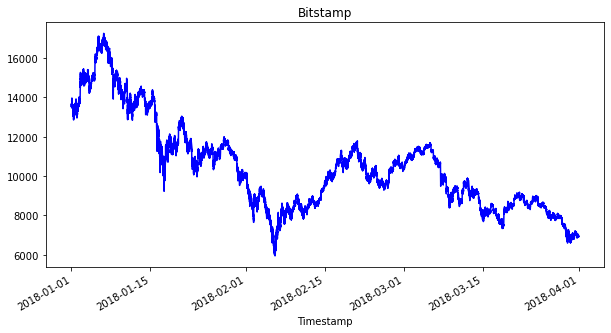

In [21]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# with the figure size, title, and color tailored to each visualization
bitstamp_sliced.plot(figsize=(10, 5), title="Bitstamp", color="blue")


<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

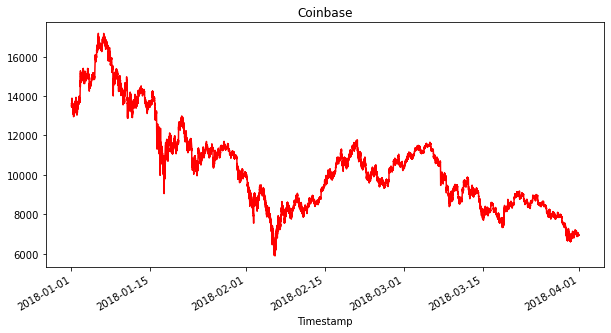

In [22]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# with the figure size, title, and color tailored to each visualization
coinbase_sliced.plot(figsize=(10, 5), title="Coinbase", color="red")

#### 3. Overlay the plot visualization for two dataframes for full period

<AxesSubplot:title={'center':'Bitstamp v. Coinbase - 1st Jan.2018 to 30th March 2018'}, xlabel='Timestamp'>

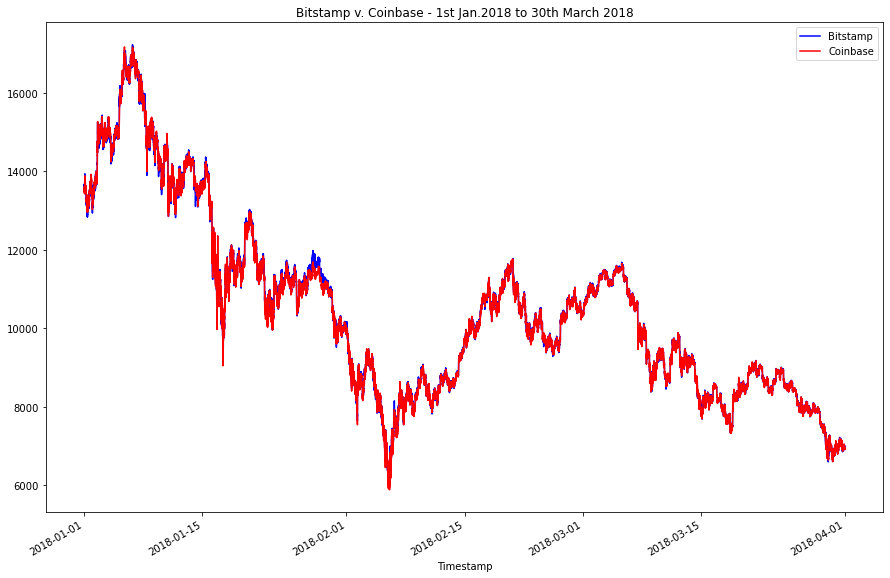

In [23]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

bitstamp_sliced.plot(legend=True, figsize=(15,10), title="Bitstamp v. Coinbase - 1st Jan.2018 to 30th March 2018", color="blue", label="Bitstamp")
coinbase_sliced.plot(legend=True, figsize=(15,10), color="red", label="Coinbase")


#### 4. Plot the price action of the assets on each exchange for different dates and times, to evaluate the spread between the two exchanges changed across the time period

<AxesSubplot:title={'center':"Bitstamp v. Coinbase-Jan'18"}, xlabel='Timestamp'>

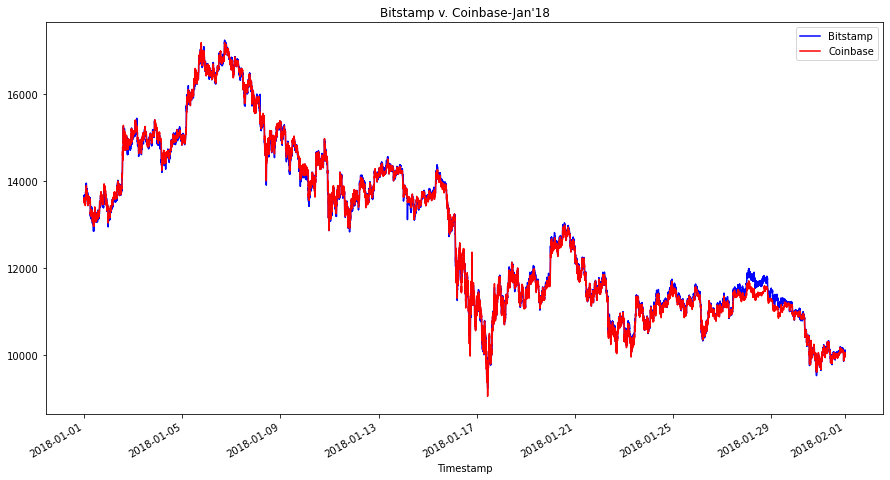

In [24]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

bitstamp['Close'].loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(15, 8), title="Bitstamp v. Coinbase-Jan'18", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(15, 8), color="red", label="Coinbase")

<AxesSubplot:title={'center':"Bitstamp v. Coinbase- Feb'18"}, xlabel='Timestamp'>

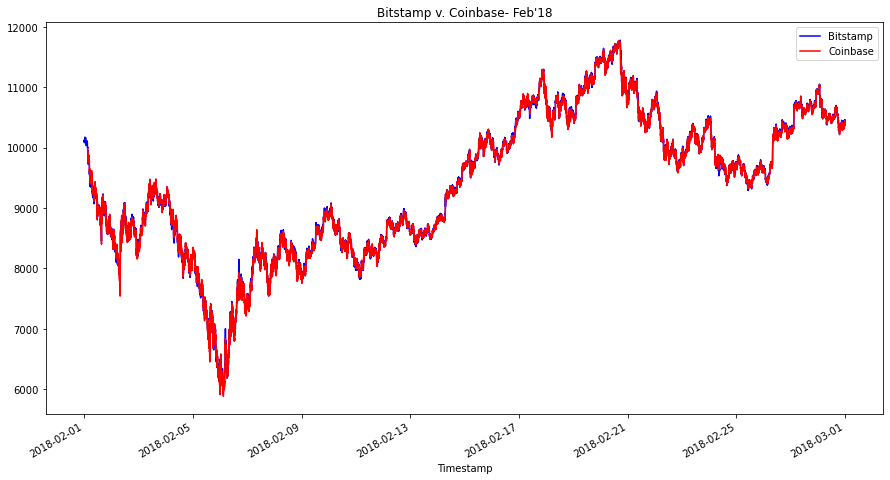

In [25]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp['Close'].loc['2018-02-01':'2018-02-28'].plot(legend=True, figsize=(15, 8), title="Bitstamp v. Coinbase- Feb'18", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-02-01':'2018-02-28'].plot(legend=True, figsize=(15, 8), color="red", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

#### Observation #### 
1.We observe from the plots that there was disparity in bitcoin prices between the two exchanges many of the times in the beginning, however it lessened further in the timeframe which shows that the profitable arbitrage opportunities should also be lesser in the later time as compared to earlier.
2.Looking at the two graphs for the month of January'18 and February'18 for the bitcoin closing prices at the two exchanges, we further observe that the spread between the exchanges has changed across the time period that the datasets define and it has lowered over time. Also, number of instances when the bitcoin had been trading at two different prices at two exchanges are lesser in later month as compared to earlier.

### Step 3: Focus Your Analysis on Specific Dates

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp v. Coinbase- 28th Jan 2018'}, xlabel='Timestamp'>

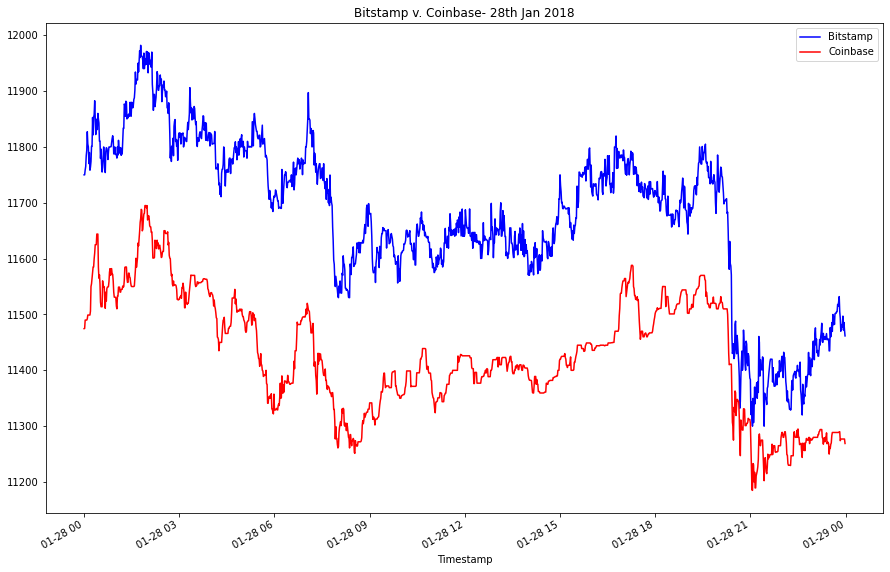

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

bitstamp['Close'].loc['2018-01-28'].plot(legend=True, figsize=(15,10), title="Bitstamp v. Coinbase- 28th Jan 2018", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-01-28'].plot(legend=True, figsize=(15,10), color="red", label="Coinbase")

In [27]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the coinbase lower closing prices from the bitstamp higher closing prices
arbitrage_spread_early = bitstamp['Close'].loc['2018-01-28']- coinbase['Close'].loc['2018-01-28']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage spread- 28th Jan 2018'}>

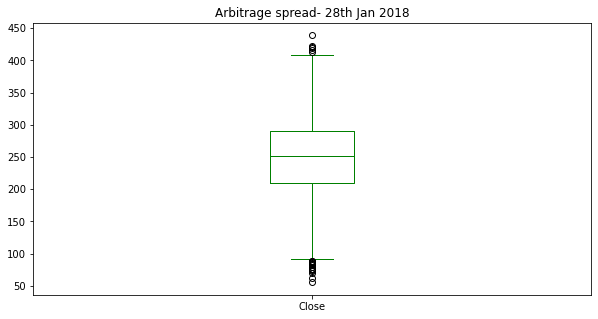

In [28]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box', figsize=(10,5), color= 'green', title= 'Arbitrage spread- 28th Jan 2018')

#### Assumption (to verify the higher priced exchange and lower priced exchange):
If coinbase would have been higher priced exchange, then arbitrage (`arbitrage_spread_early_alt`) is calculated by subtracting bitstamp closing prices from coinbase closing prices(higher). But as result, the statistical summary shows the mean values comes as `negative`, as well as other parameters. So, we understand that bitstamp must be higher priced exchange than coinbase during the period under consideration i.e. early.

In [29]:
arbitrage_spread_early_alt = coinbase['Close'].loc['2018-01-28']- bitstamp['Close'].loc['2018-01-28']
arbitrage_spread_early_alt.describe()

count    1436.000000
mean     -247.552326
std        68.343472
min      -439.010000
25%      -290.925000
50%      -251.180000
75%      -210.022500
max       -55.030000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase- 28th Feb 2018'}, xlabel='Timestamp'>

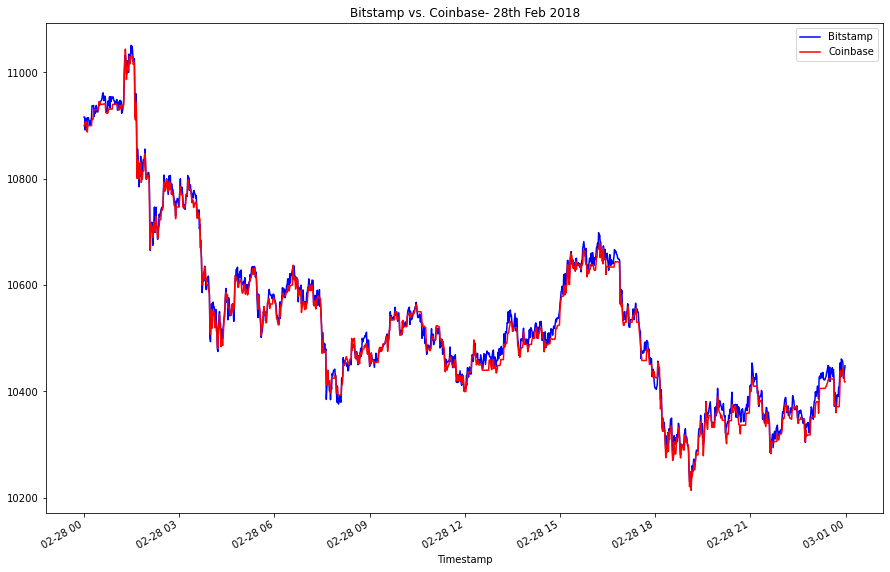

In [30]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-02-28'].plot(legend= True, figsize=(15,10), title= "Bitstamp vs. Coinbase- 28th Feb 2018", label= "Bitstamp", color= "blue")
coinbase['Close'].loc['2018-02-28'].plot(legend= True, figsize=(15,10), label= "Coinbase", color= "red")

In [31]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the coinbase lower closing prices from the bitstamp higher closing prices  
arbitrage_spread_middle = bitstamp['Close'].loc['2018-02-28']- coinbase['Close'].loc['2018-02-28']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1430.000000
mean        7.755825
std        11.296502
min       -35.000000
25%         0.145000
50%         7.815000
75%        15.207500
max        46.000000
Name: Close, dtype: float64

We observe that in the middle period,for which we are analysing arbitrage opportunities,most of the time bitcoin was trading at higher prices in bitstamp than in coinbase. So,arbitrage spread can be calculated by subtracting the coinbase(lower-priced exchange) closing prices from the bitstamp(higher priced) closing prices. But also, looking at the negative profit values, we understand that there were times or instances, when the bitcoin was trading at higher price at coinbase than bitstamp.

#### Assumption (to verify the higher priced exchange and lower priced exchange)
If coinbase would have been higher priced exchange, then arbitrage (arbitrage_spread_middle_alt) is calculated by subtracting bitstamp closing prices from coinbase closing prices. But the mean values comes as negative, as well as other parameters. So, we understand that bitstamp must be higher priced exchange than coinbase during the period under consideration i.e. middle.

In [32]:
arbitrage_spread_middle_alt = coinbase['Close'].loc['2018-02-28']- bitstamp['Close'].loc['2018-02-28']
arbitrage_spread_middle_alt.describe()

count    1430.000000
mean       -7.755825
std        11.296502
min       -46.000000
25%       -15.207500
50%        -7.815000
75%        -0.145000
max        35.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage spread- 28th Feb 2018'}>

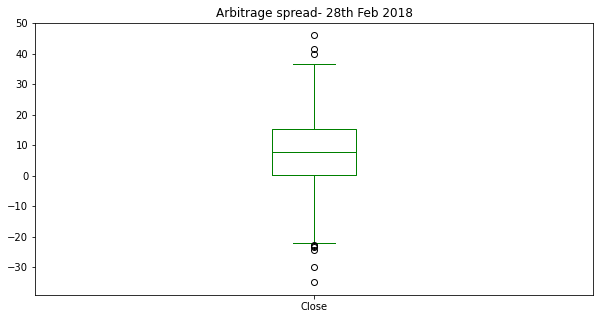

In [33]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box', figsize=(10,5), color= 'green', title= 'Arbitrage spread- 28th Feb 2018')

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase- 30th March 2018'}, xlabel='Timestamp'>

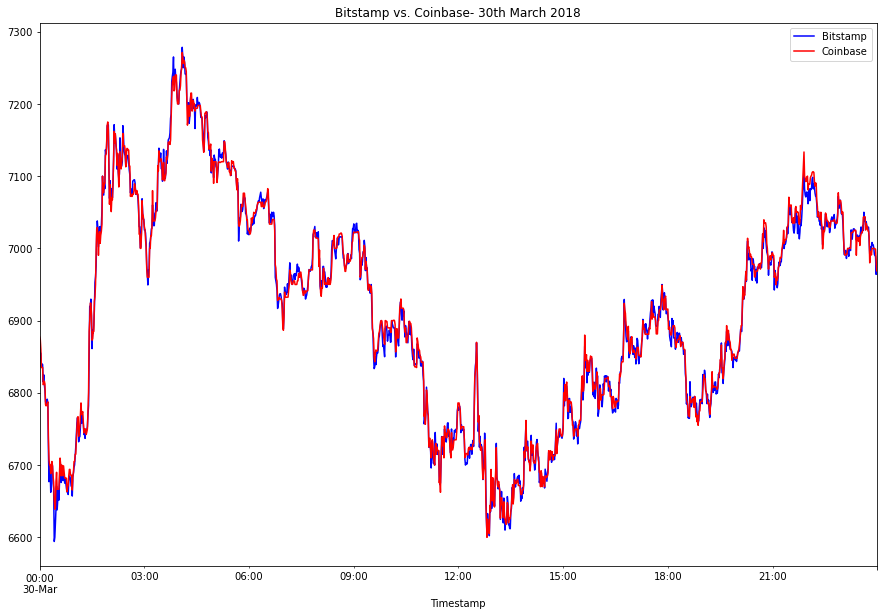

In [34]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-03-30'].plot(legend= True, figsize=(15,10), title= "Bitstamp vs. Coinbase- 30th March 2018", label= "Bitstamp", color= "blue")
coinbase['Close'].loc['2018-03-30'].plot(legend= True, figsize=(15,10), label= "Coinbase", color= "red")

In [35]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase['Close'].loc['2018-03-30']-bitstamp['Close'].loc['2018-03-30']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1440.000000
mean        1.419507
std         8.918465
min       -30.000000
25%        -4.412500
50%         1.205000
75%         6.640000
max        56.920000
Name: Close, dtype: float64

We observe that in the period,for which we are analysing arbitrage opportunities i.e. 2018-03-30,bitcoin was trading at higher prices in coinbase than in bitstamp. So,positive arbitrage spread can be calculated by by subtracting the bitstamp( lower-priced exchange)closing prices from the coinbase closing prices.

<AxesSubplot:title={'center':'Arbitrage spread- 30th March 2018'}>

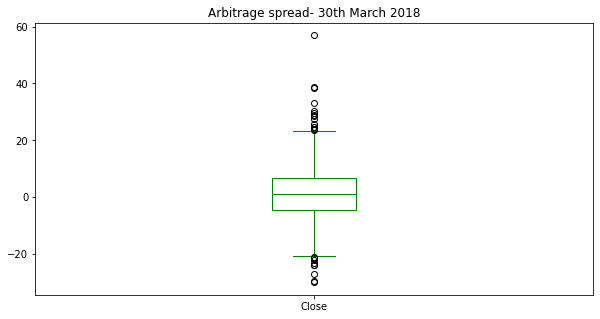

In [36]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box', figsize=(10,5), color= 'green', title= 'Arbitrage spread- 30th March 2018')

#### Assumption (to verify the higher priced exchange and lower priced exchange)
If bitstamp would have been higher priced exchange, then arbitrage `(arbitrage_spread_late_alt)` is calculated by subtracting coinbase closing prices from bitstamp closing prices (higher). But the mean values comes as `negative`, as well as other parameters. So, we understand that `coinbase must be higher priced exchange than coinbase during the period under consideration i.e. late`.

In [37]:
arbitrage_spread_late_alt = bitstamp['Close'].loc['2018-03-30']- coinbase['Close'].loc['2018-03-30']
arbitrage_spread_late_alt.describe()

count    1440.000000
mean       -1.419507
std         8.918465
min       -56.920000
25%        -6.640000
50%        -1.205000
75%         4.412500
max        30.000000
Name: Close, dtype: float64

### Observation:
It is observed that for the first two dates in the the dataset i.e 28 Jan.,18 and 28 Feb.18, most of the times, the prices in bitstamp exchange were higher than coinbase exchange whereas on the later date i.e. 30 March,18, coinbase exchange had higher bitcoin prices than bitstamp. Although, the instances or number of opportunities for arbitrage on the three dates were almost similar, but the arbitrage has very much narrowed down from spread mean in January (247.55) to February (7.7558) and further in to March (1.4195)

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date selected in the previous section, to determine whether arbitrage opportunities still exist in the Bitcoin market.

1. For each of the three dates, using the arbitrage spread between the two exchanges (by subtracting the lower-priced exchange from the higher-priced one) already calculated in previous section and a conditional statement, generate the summary statistics for each `arbitrage_spread DataFrame, where the spread is greater than zero`.

2. For each of the three dates, calculate the `spread returns`.

   `spread Returns = arbitrage_spread DataFrame, the spread is greater than zero)/ bitcoin price in the lower-priced 
     exchange` 

3. For each of the three dates, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the `potential profit`, in dollars, per trade. 
  `potential profit =  spread returns greater than 1% *  the cost of what was purchased`

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the `potential arbitrage profits` that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?


#### 1. For each of the three dates, use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

In [38]:
# For the date early in the dataset, using the arbitrage spread between the two exchanges calculated in previous section already(by subtracting the lower-priced exchange from the higher-priced one)
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early>0].describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [39]:
# For the date in the middle of dataset,using the arbitrage spread calculated already in previous section
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle[arbitrage_spread_middle>0].describe()

count    1080.000000
mean       12.486259
std         8.128835
min         0.010000
25%         6.060000
50%        11.260000
75%        17.875000
max        46.000000
Name: Close, dtype: float64

In [40]:
# For the date late in the dataset, using the arbitrage spread calculated already in previous section
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

# Generate summary statistics for the late DataFrame
arbitrage_spread_late[arbitrage_spread_late>0].describe()

count    797.000000
mean       7.538846
std        6.265063
min        0.010000
25%        2.780000
50%        6.060000
75%       10.570000
max       56.920000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [41]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0] / coinbase['Close'].loc['2018-01-28']

# Review the spread return DataFrame
display(spread_return_early.head())
display(spread_return_early.describe())


Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

count    1436.000000
mean        0.021648
std         0.005961
min         0.004885
25%         0.018369
50%         0.021897
75%         0.025292
max         0.038510
Name: Close, dtype: float64

In [42]:
# For the date middle in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).


spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0] / coinbase['Close'].loc['2018-02-28']
display(spread_return_middle.isnull().sum())
spread_return_middle= spread_return_middle.dropna()
spread_return_middle.describe()


359

count    1.080000e+03
mean     1.187813e-03
std      7.760206e-04
min      9.532898e-07
25%      5.767797e-04
50%      1.064639e-03
75%      1.702357e-03
max      4.431599e-03
Name: Close, dtype: float64

In [43]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp['Close'].loc['2018-03-30']

# Review the spread return DataFrame
display(spread_return_late.isnull().sum())
display(spread_return_late.describe())
spread_return_late= spread_return_late.dropna()
spread_return_late

643

count    797.000000
mean       0.001095
std        0.000915
min        0.000001
25%        0.000403
50%        0.000877
75%        0.001545
max        0.008632
Name: Close, dtype: float64

Timestamp
2018-03-30 00:00:00    0.002529
2018-03-30 00:01:00    0.002637
2018-03-30 00:02:00    0.000792
2018-03-30 00:08:00    0.000714
2018-03-30 00:09:00    0.001279
                         ...   
2018-03-30 23:46:00    0.000576
2018-03-30 23:55:00    0.001190
2018-03-30 23:56:00    0.001289
2018-03-30 23:57:00    0.001362
2018-03-30 23:58:00    0.002868
Name: Close, Length: 797, dtype: float64

#### Observation
Looking at the summary data of spread returns for the three dates under consideration i.e. early, middle and late in the dataset, we can see that early in the dataset i.e. 28th January 2018, there were ample of opportunities for arbitrage i.e. 1436 (arbitrage spread) wherein 1378 trades were profitable (i.e.the trades with positive returns exceed the 1% minimum threshold to cover the costs). However the number of instances when the spread return would have been positive(greater than 0) or profitable  have narrowed down quitely in periods middle(28th Feb.2018) and late(30th March 2018) in the dataset, which is evident from the summary statistics which shows 0 profitable trades(spread returns>1%), though they had positive spread returns(spread returns>0) 1080 times and 797 times respectively in the mentioned periods.


#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [44]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>.01]

# Review the first five profitable trades
display(profitable_trades_early.head())
profitable_trades_early.describe()


Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

In [45]:
# For the date middle in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs

profitable_trades_middle = spread_return_middle[spread_return_middle>.01]

# Review the first five profitable trades
display(profitable_trades_middle.head())


Series([], Name: Close, dtype: float64)

In [46]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late= spread_return_late[spread_return_late> .01]

profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [47]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

##### Looking at the summary data of three dates under consideration i.e. early, middle and late in the dataset, we can see that early in the dataset i.e. 28th January 2018, there were ample of opportunities for arbitrage i.e. 1436 (arbitrage spread) where 1378 trades were profitable (i.e.the trades with positive returns exceed the 1% minimum threshold to cover your costs). However the number of instances when the arbitrage spread would have been positive(greater than 0) or profitable (returns exceed the 1% minimum threshold) have narrowed down quitely in periods middle( 28th Feb.2018) and late(30th March 2018) in the dataset, which is evident from the summary statistics which shows 0 profitable trades.

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [48]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase['Close'].loc['2018-01-28']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
display(profit_per_trade_early.head())
display(profit_per_trade_early.describe())

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
Name: Close, dtype: float64

count    1378.000000
mean      253.931996
std        62.057953
min       113.970000
25%       217.272500
50%       254.150000
75%       292.987500
max       439.010000
Name: Close, dtype: float64

#### There were no profitable trades on the selected date in the middle and late in the dataset,so potential profit in dollars is 0.


In [49]:
profit_middle = profitable_trades_middle * coinbase['Close'].loc['2018-02-28']
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_middle.head()

Series([], Name: Close, dtype: float64)

In [50]:
profit_late = profitable_trades_late * bitstamp['Close'].loc['2018-03-30']
profit_per_trade_late = profit_late.dropna()
profit_per_trade_late.head()

Series([], Name: Close, dtype: float64)

#### Observation
The potential profits per trade on the early date (28th Jan.2018) were in three figures with mean of 253.931996, max, value as 439.010000 and standard deviation of 62.057953, whereas there was no potential profit per trade in the middle and later dates as there were no profitable trades in these periods which exceeded the minimum threshold of 1% to cover the cost.The observation is confirmed by looking at the plots.

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [51]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    1378.000000
mean      253.931996
std        62.057953
min       113.970000
25%       217.272500
50%       254.150000
75%       292.987500
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit per trade 28th Jan 2018'}, xlabel='Timestamp'>

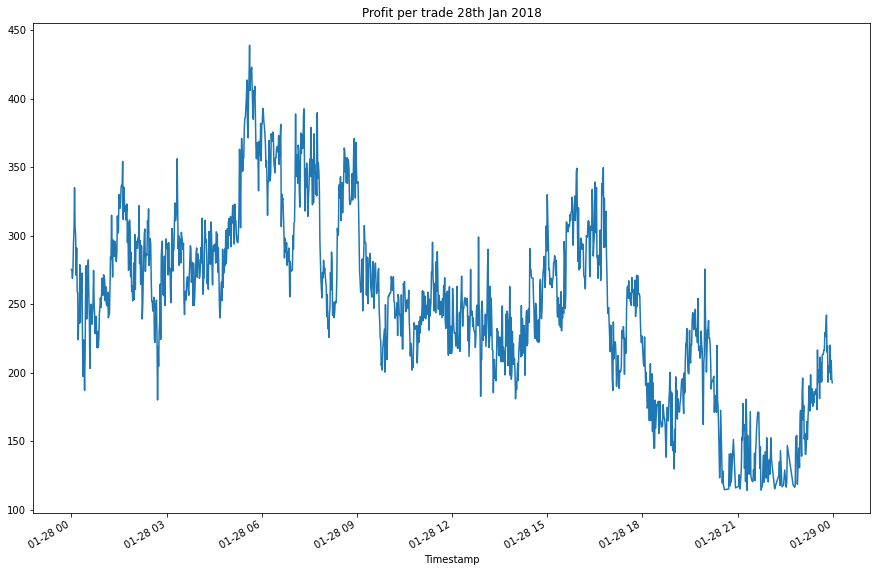

In [52]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize= (15,10), title= "Profit per trade 28th Jan 2018")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [53]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

349918.2900000001

The potential arbitrage profit for 28th Jan.2018 was 349918.2900000001 dollars, however it narrowed down down to $0.00 in 28th March 2018.


#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [54]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early

Timestamp
2018-01-28 00:00:00       275.38
2018-01-28 00:01:00       550.38
2018-01-28 00:02:00       819.15
2018-01-28 00:03:00      1094.18
2018-01-28 00:04:00      1388.44
                         ...    
2018-01-28 23:55:00    349126.69
2018-01-28 23:56:00    349321.80
2018-01-28 23:57:00    349530.54
2018-01-28 23:58:00    349725.66
2018-01-28 23:59:00    349918.29
Name: Close, Length: 1378, dtype: float64

The cumulative profits for the date 28th Jan.2018 started at 275.38 dollars at the beginning of the day and soared to 349918.29 dollars at the end of the day. There were no profits at the dates chosen in middle and late in the dataset.

<AxesSubplot:title={'center':'Cumulative Profits 28th Jan 2018'}, xlabel='Timestamp'>

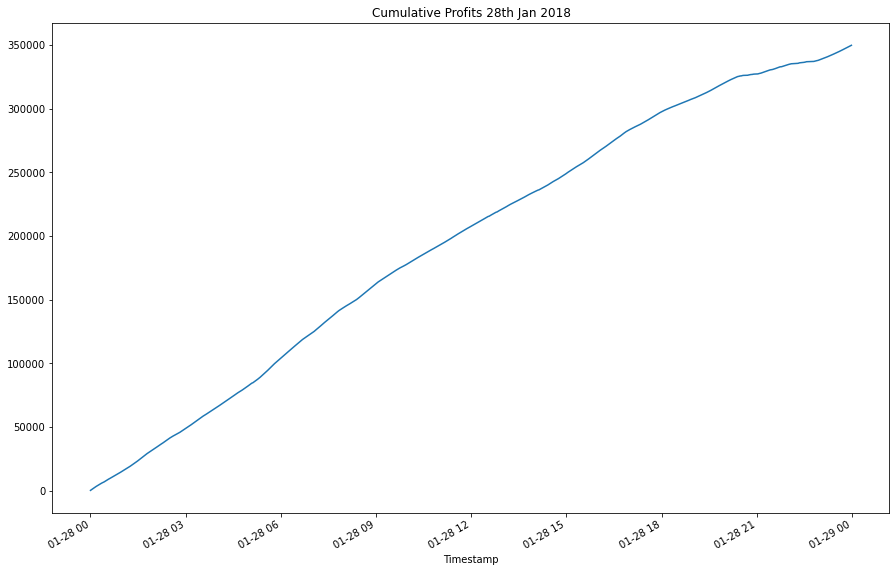

In [55]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize= (15,10), title= "Cumulative Profits 28th Jan 2018")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:**  From the above analysis, we can understand that although there were  good opportunities for arbitrage and potential profits covering the cost,they narrowed down to arbitrage opportunities which can not cover the cost or which are profitable. From the plots and summary of the full period and the sliced dataframes we can see that even though there are almost equal instances in the early, middle and late in the period in the datset, when bitcoin trades at the different prices at the two exchanges, the  spread between the two has narrowed down  so much with the time that there cannot be potential profitable arbitrage trades.
